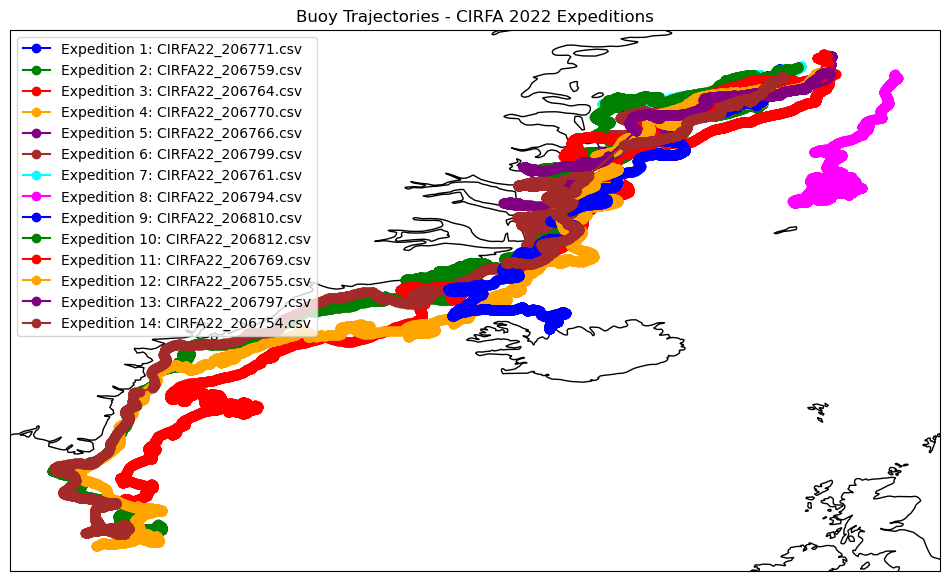

In [7]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import sys
sys.path.append('/Users/aless/Desktop/icedrift/src')

from icedrift.analysis import compute_velocity

#

# Define the path to the folder containing the CSV files
folder_path = "/Users/aless/Desktop/sea_ice_variability/data/buoy_data/cirfa2022/"

# List all CSV files in the folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Initialize the plot with a map background
plt.figure(figsize=(12, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

# 

# Define a list of colors for each expedition (you can add more if needed)
colors = ['blue', 'green', 'red', 'orange', 'purple', 'brown', 'cyan', 'magenta']

# Iterate over the CSV files and plot each one
for i, file in enumerate(csv_files):
    # Load each CSV file into a DataFrame
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path, header=None, names=['datetime', 'latitude', 'longitude'])
    
    # Convert 'datetime' column to datetime type
    df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')

    # Clean the data by removing invalid rows and converting to numeric
    df['longitude'] = pd.to_numeric(df['longitude'], errors='coerce')
    df['latitude'] = pd.to_numeric(df['latitude'], errors='coerce')
    df_cleaned = df.dropna(subset=['longitude', 'latitude'])

    # Plot the trajectory using a unique color for each expedition
    ax.plot(df_cleaned['longitude'], df_cleaned['latitude'], linestyle='-', marker='o', 
            color=colors[i % len(colors)], label=f'Expedition {i + 1}: {file}')
    
# Add labels, title, and legend
plt.title('Buoy Trajectories - CIRFA 2022 Expeditions')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left')

# Show the plot
plt.show()


